In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Correlation matrix to find features with the highest correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:

df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Display the encoded dataframe
print(df_encoded.head())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying the features to be scaled (excluding 'chd' which is the target and 'famhist_Present' which is already binary)
features_to_scale = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Standardizing the features
scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Display the standardized dataframe
print(df_encoded.head())



In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [13]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # To prevent log(0)
    cost = (-1/m) * ((y.T @ np.log(h + epsilon)) + ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost


In [14]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history


In [ ]:
# Define the features and target variable
X = df_encoded.drop('chd', axis=1)  # Drop the target variable to get the features
y = df_encoded['chd']  # The target variable

# Initializing initial_theta should work
np.random.seed(42)  # For reproducibility
initial_theta = np.random.rand(X.shape[1])  # X.shape[1] gives the number of features

# Display the initial theta values
print(initial_theta)

# np.random.seed(42)  # For reproducibility
# initial_theta = np.random.rand(X.shape[1])


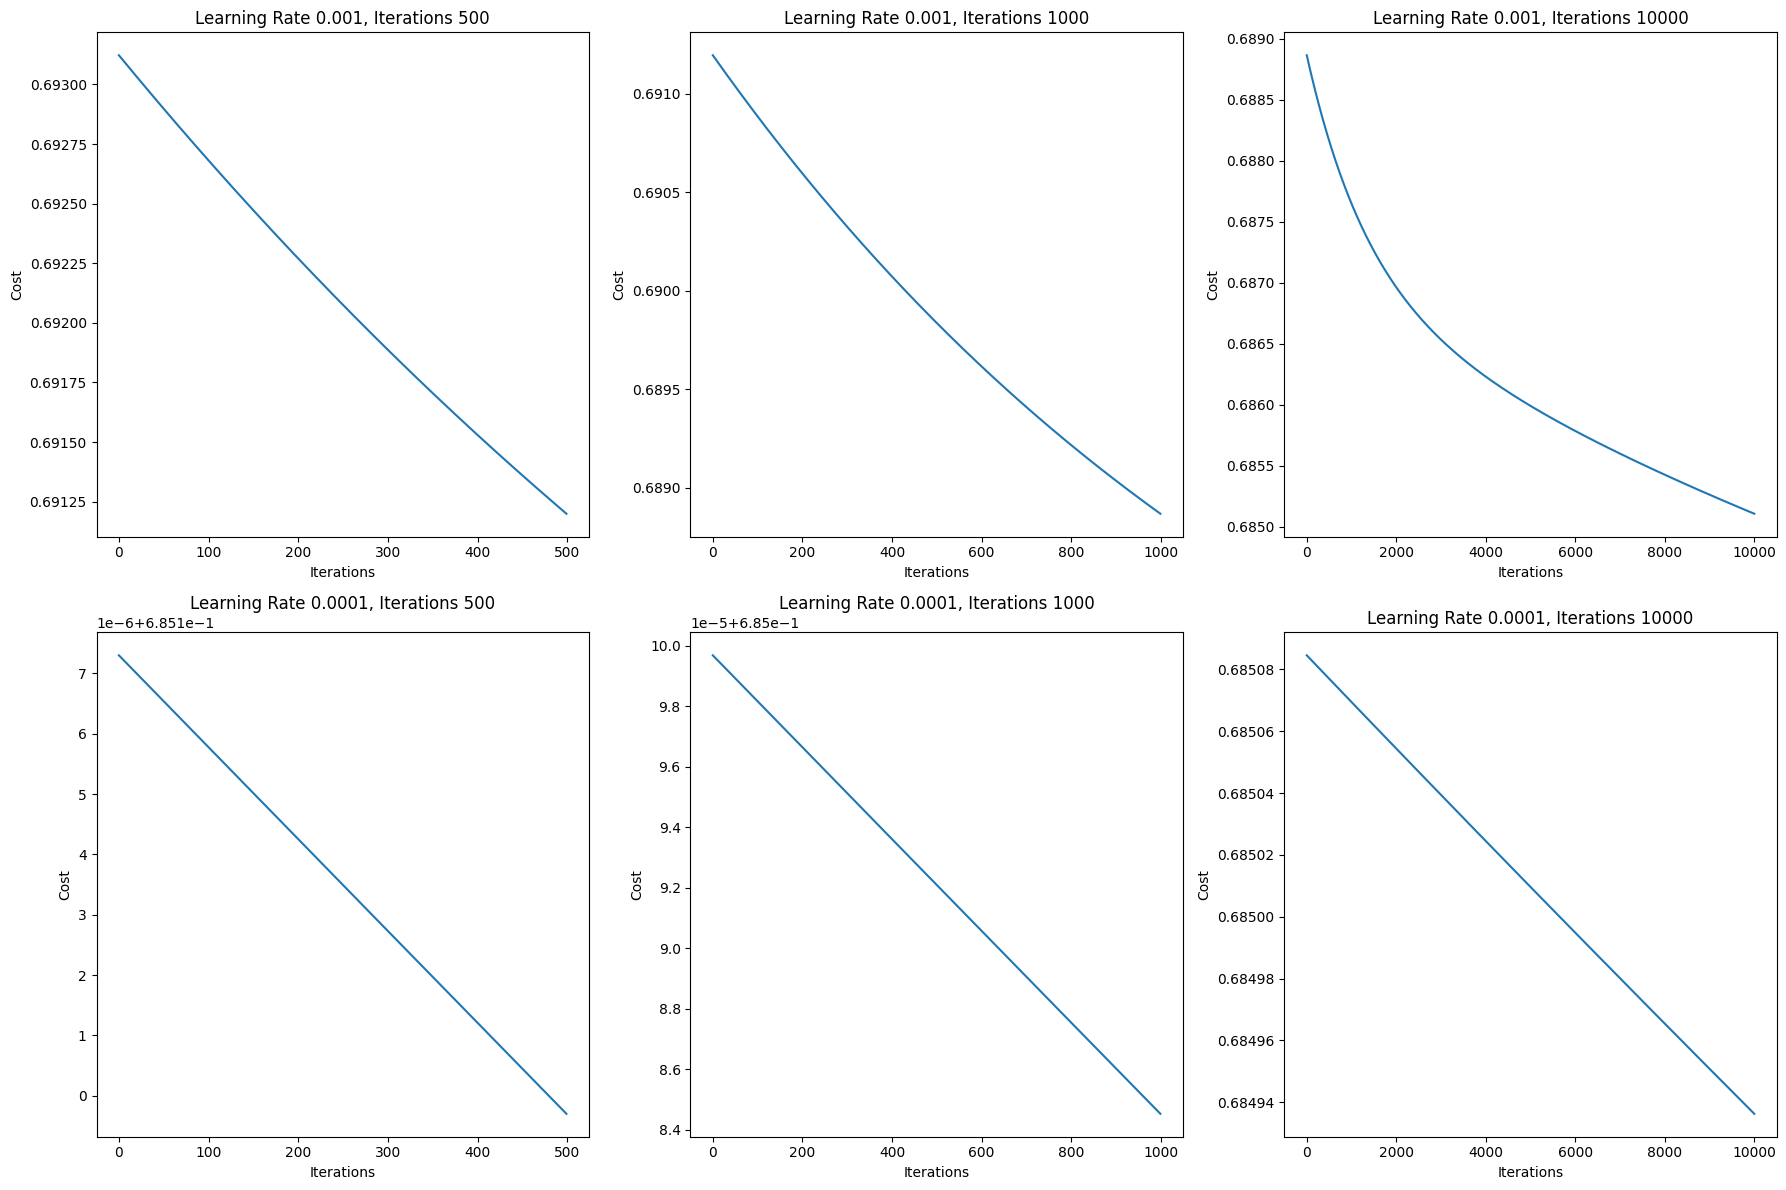

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # To prevent log(0)
    cost = (-1/m) * ((y.T @ np.log(h + epsilon)) + ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# Example dataset (assuming X and y are already defined and preprocessed)
# For the purpose of this example, let's generate some random data for X and y
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 examples, 2 features
y = np.random.randint(0, 2, 100)  # 100 binary target values
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)  # Adding intercept term

initial_theta = np.zeros(X.shape[1])

# Learning rates and iterations
learning_rates = [0.001, 0.0001]
iterations_list = [500, 1000, 10000]

# Plot learning curves
plt.figure(figsize=(18, 12))

for i, alpha in enumerate(learning_rates):
    for j, iterations in enumerate(iterations_list):
        theta, cost_history = gradient_descent(X, y, initial_theta, alpha, iterations)
        plt.subplot(len(learning_rates), len(iterations_list), i*len(iterations_list)+j+1)
        plt.plot(cost_history)
        plt.title(f"Learning Rate {alpha}, Iterations {iterations}")
        plt.xlabel('Iterations')
        plt.ylabel('Cost')

plt.tight_layout()
plt.show()


# # Assuming alpha and iterations are defined
# _, cost_history = gradient_descent(X, y, initial_theta, alpha, iterations)

# plt.plot(range(1, iterations + 1), cost_history, color='blue')
# plt.rcParams["figure.figsize"] = (10,6)
# plt.grid()
# plt.xlabel('Number of iterations')
# plt.ylabel('Cost (J)')
# plt.title('Learning curve')
# plt.show()


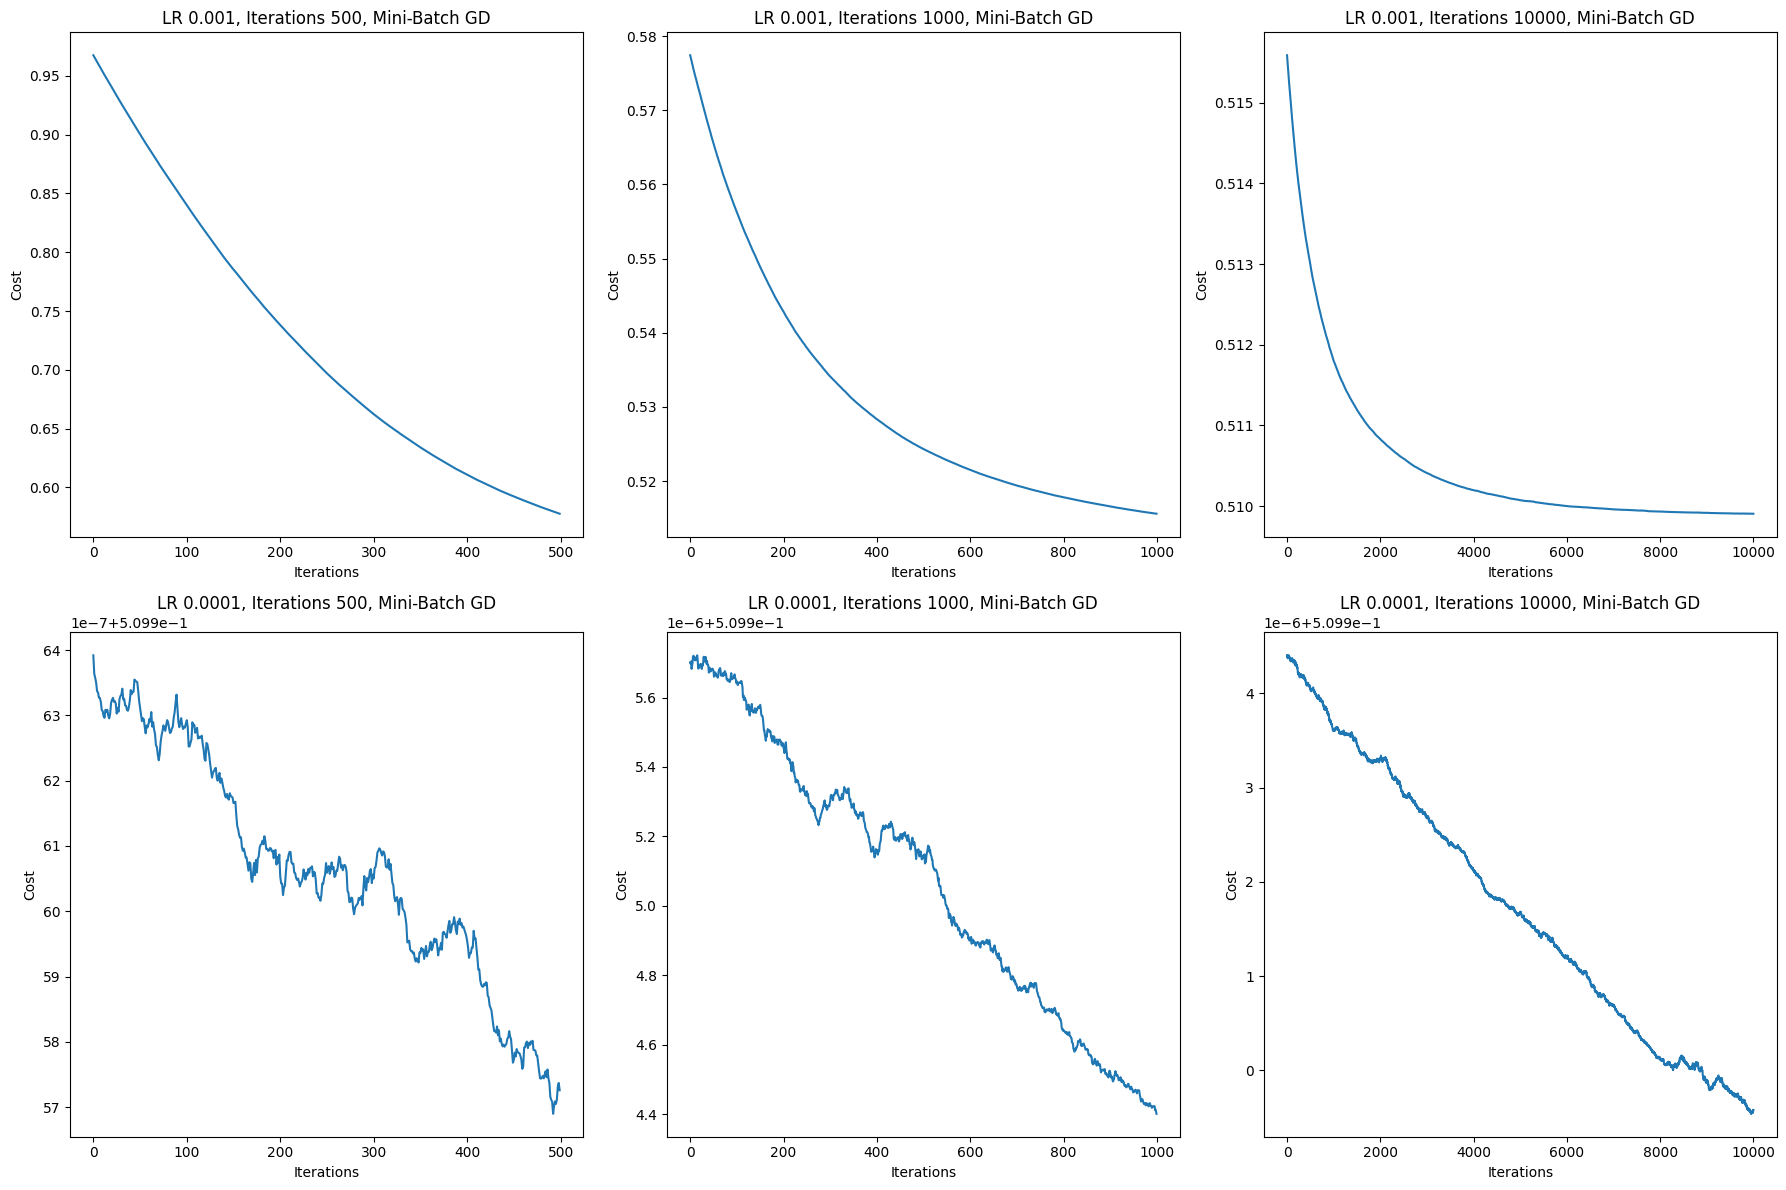

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Defining functions for logistic regression with mini-batch gradient descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # To prevent log(0)
    cost = (-1/m) * ((y.T @ np.log(h + epsilon)) + ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        X, y = shuffle(X, y)  # Shuffle dataset to ensure random mini-batch selection
        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch = X[start:end]
            y_batch = y[start:end]

            gradient = X_batch.T @ (sigmoid(X_batch @ theta) - y_batch) / y_batch.size
            theta -= alpha * gradient

        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# Load and preprocess dataset
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Splitting into features and target variable
X = df_encoded.drop('chd', axis=1).values
y = df_encoded['chd'].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding intercept term
X_scaled_with_intercept = np.concatenate([np.ones((X_scaled.shape[0], 1)), X_scaled], axis=1)

# Initialize theta
np.random.seed(42)  # For reproducibility
initial_theta = np.random.rand(X_scaled_with_intercept.shape[1])

# Learning rates and iterations
learning_rates = [0.001, 0.0001]
iterations_list = [500, 1000, 10000]
batch_size = 50

# Plot learning curves for mini-batch gradient descent
plt.figure(figsize=(18, 12))

for i, alpha in enumerate(learning_rates):
    for j, iterations in enumerate(iterations_list):
        theta, cost_history = mini_batch_gradient_descent(X_scaled_with_intercept, y, initial_theta, alpha, iterations, batch_size)
        plt.subplot(len(learning_rates), len(iterations_list), i*len(iterations_list)+j+1)
        plt.plot(cost_history)
        plt.title(f"LR {alpha}, Iterations {iterations}, Mini-Batch GD")
        plt.xlabel('Iterations')
        plt.ylabel('Cost')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Splitting into features and target variable
X = df_encoded.drop('chd', axis=1).values
y = df_encoded['chd'].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adding intercept term
X_scaled_with_intercept = np.concatenate([np.ones((X_scaled.shape[0], 1)), X_scaled], axis=1)

# Mini-batch Gradient Descent Implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (-1/m) * ((y.T @ np.log(h + epsilon)) + ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            gradient = X_batch.T @ (sigmoid(X_batch @ theta) - y_batch) / y_batch.size
            theta -= alpha * gradient
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

# Initialize theta
np.random.seed(42)
initial_theta = np.random.rand(X_scaled_with_intercept.shape[1])

# Parameters for Gradient Descent
alpha = 0.01
iterations = 1000
batch_size = 16

# Running Mini-batch Gradient Descent
theta, cost_history = mini_batch_gradient_descent(X_scaled_with_intercept, y, initial_theta, alpha, iterations, batch_size)

# Print Custom Model Coefficients
print("Custom Logistic Regression Coefficients:\n", theta)

# Scikit-Learn Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Print Scikit-Learn Coefficients
print("\nScikit-Learn Logistic Regression Coefficients:\n Intercept:", log_reg.intercept_, "\n Coefficients:", log_reg.coef_)

# Optionally, plot the cost history to see how it decreases over time
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()
